In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

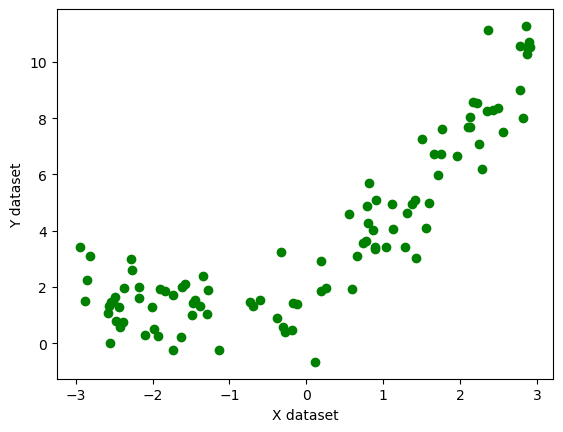

In [151]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# the above line is the quadratic equation used: y = 0.5x^2 + 1.5x + 2 + outilers
plt.scatter(X, y, color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
# Let's implement a simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [157]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [159]:
from sklearn.metrics import r2_score
score=r2_score(y_test, regression_1.predict(X_test))
print(score)

0.45440048278701595


Text(0, 0.5, 'Y')

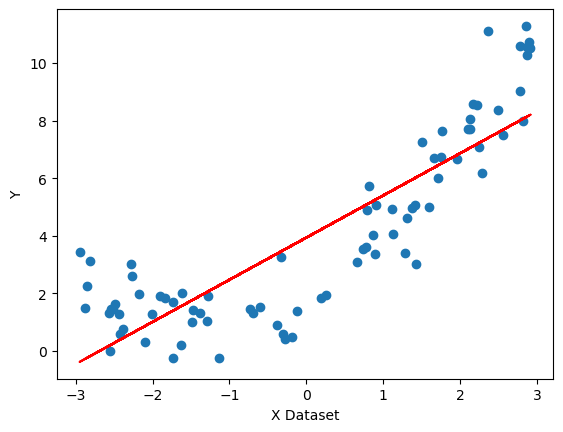

In [161]:
# Visualize this model
plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [185]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

In [187]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [189]:
X_test_poly

array([[ 1.        , -0.17460731,  0.03048771],
       [ 1.        , -1.57646374,  2.48523793],
       [ 1.        , -2.57349303,  6.62286635],
       [ 1.        ,  0.80396038,  0.6463523 ],
       [ 1.        ,  0.89562745,  0.80214854],
       [ 1.        , -2.17651875,  4.73723387],
       [ 1.        , -2.47995236,  6.1501637 ],
       [ 1.        , -1.45142673,  2.10663954],
       [ 1.        ,  0.19598968,  0.03841195],
       [ 1.        , -1.97818046,  3.91319794],
       [ 1.        ,  2.34693743,  5.50811532],
       [ 1.        ,  0.59520407,  0.35426788],
       [ 1.        ,  1.55483537,  2.41751304],
       [ 1.        , -1.34658782,  1.81329875],
       [ 1.        , -1.9317898 ,  3.73181182],
       [ 1.        ,  0.55803609,  0.31140428],
       [ 1.        ,  2.42614276,  5.8861687 ],
       [ 1.        ,  1.03605131,  1.07340232],
       [ 1.        ,  0.11645541,  0.01356186],
       [ 1.        , -2.36556953,  5.59591919]])

In [191]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test, y_pred)
print(score)

0.7888677466429737


In [197]:
print(regression.coef_)

[[0.         1.44925542 0.50262522]]


In [201]:
print(regression.intercept_)

[2.11003143]


In [193]:
poly_reg_model=LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [195]:
print(poly_reg_model.intercept_, poly_reg_model.coef_)

[2.0381573] [[ 0.          1.50730326  0.51032545 -0.01178835]]


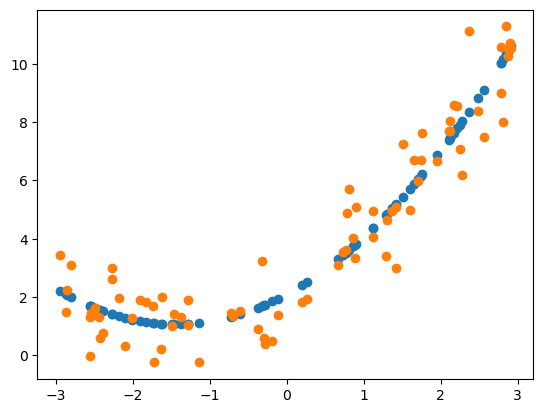

In [211]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [215]:
## Prediction of new dataset
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

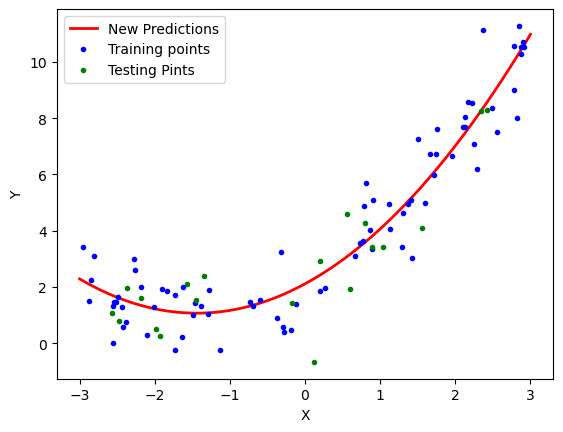

In [225]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label="New Predictions")
plt.plot(X_train, y_train, 'b.', label='Training points')
plt.plot(X_test, y_test, 'g.', label='Testing Pints')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()